In [770]:
import numpy as np


In [771]:
import pandas as pd

In [772]:
import matplotlib.pyplot as plt

In [773]:
import seaborn as sns

In [774]:
df = pd.read_csv('mymoviedb (2).csv', lineterminator = '\n')
                 

In [775]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [776]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2447 entries, 0 to 2446
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       2447 non-null   object 
 1   Title              2447 non-null   object 
 2   Overview           2447 non-null   object 
 3   Popularity         2447 non-null   float64
 4   Vote_Count         2447 non-null   int64  
 5   Vote_Average       2447 non-null   float64
 6   Original_Language  2447 non-null   object 
 7   Genre              2447 non-null   object 
 8   Poster_Url         2447 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 172.2+ KB


In [777]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [778]:
df.duplicated().sum()

0

In [779]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,2447.000000,2447.000000,2447.000000
mean,101.913947,3146.480180,6.625868
std,206.080884,4313.779159,1.102282
min,35.266000,0.000000,0.000000
25%,43.347500,227.000000,6.100000
50%,57.705000,1298.000000,6.700000
75%,92.618000,4559.000000,7.300000
max,5083.954000,31077.000000,9.100000


In [780]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [781]:
df['Release_Date'] =df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [782]:
 df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [783]:
3
#Dropping the columns

3

In [784]:
cols = ['Overview','Original_Language','Poster_Url']

In [785]:
df.drop(cols,axis = 1, inplace = True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [786]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


In [787]:
#categorizing Vote_Average column
#we would cut the Vote_Average value and makke 4 categories popular average below_age not_popular to describe it more using catigorizw_col() function provided above

In [788]:
def catigorize_col(df,col,labels):
    edges =  [df[col].describe()['min'],
             df[col].describe()['25%'],
             df[col].describe()['50%'],
             df[col].describe()['75%'],
             df[col].describe()['max']]
    df[col] = pd.cut(df[col],edges,labels = labels, duplicates = 'drop')
    return df

In [789]:
labels = ['not_popular','below_avg','average','popular']
catigorize_col(df,'Vote_Average',labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [790]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [791]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    622
below_avg      621
average        601
popular        581
Name: count, dtype: int64

In [792]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [793]:
#we 'd split genres into a list and then explode our dataframe to have only one genre per row for each movie

In [794]:

df['Genre'] = df['Genre'].str.split(',')
df = df.explode('Genre').reset_index(drop = True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [795]:
#casting column into category

In [796]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=[' Action', ' Adventure', ' Animation', ' Comedy', ' Crime',
                  ' Documentary', ' Drama', ' Family', ' Fantasy', ' History',
                  ' Horror', ' Music', ' Mystery', ' Romance',
                  ' Science Fiction', ' TV Movie', ' Thriller', ' War',
                  ' Western', 'Action', 'Adventure', 'Animation', 'Comedy',
                  'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
                  'History', 'Horror', 'Music', 'Mystery', 'Romance',
                  'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [797]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6787 entries, 0 to 6786
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  6787 non-null   int32   
 1   Title         6787 non-null   object  
 2   Popularity    6787 non-null   float64 
 3   Vote_Count    6787 non-null   int64   
 4   Vote_Average  6713 non-null   category
 5   Genre         6787 non-null   category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 200.5+ KB


In [798]:
df.nunique()

Release_Date      75
Title           2400
Popularity      2399
Vote_Count      1836
Vote_Average       4
Genre             38
dtype: int64

In [799]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [800]:
#Data Visualizatiob

In [801]:
sns.set_style('whitegrid')

In [802]:
#What is the most frequent genre of movie released on netflix

In [803]:
df['Genre'].describe()

count          6787
unique           38
top        Thriller
freq            493
Name: Genre, dtype: object

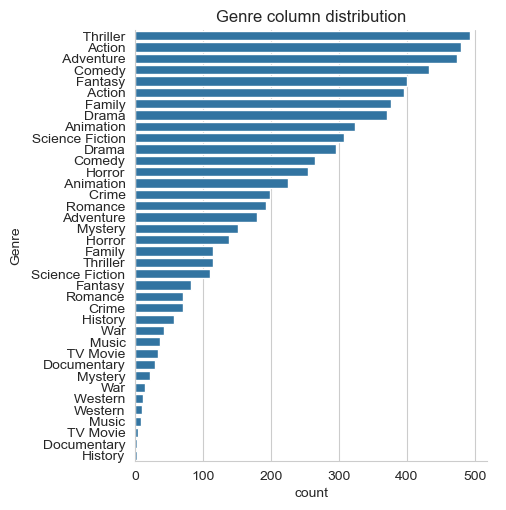

In [806]:
sns.catplot(y = 'Genre',data = df, kind = 'count',
            order = df['Genre'].value_counts().index)
plt.title('Genre column distribution')
plt.show()

In [ ]:
df.head()

In [ ]:
#Which has highest vote in vote avg column ?

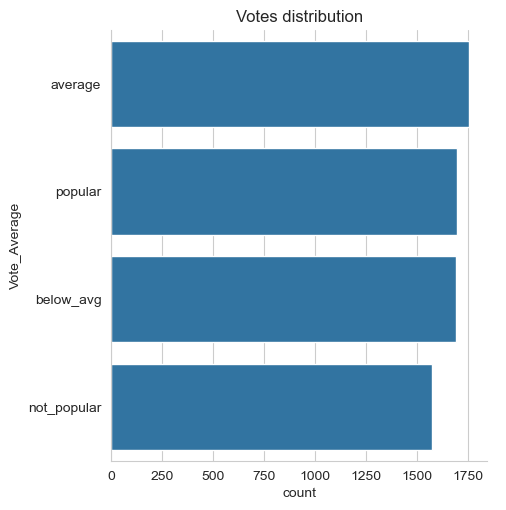

In [805]:
sns.catplot(y = 'Vote_Average',data = df, kind = 'count',
            order = df['Vote_Average'].value_counts().index)
plt.title('Votes distribution')
plt.show()

In [ ]:
#What movie got the highest popularity ? what's its genre?

In [807]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [810]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [ ]:
#What movie got the lowest popularity? what's its genre?

In [811]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
6783,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Adventure
6784,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Animation
6785,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Family
6786,1991,An American Tail: Fievel Goes West,35.266,588,below_avg,Western


In [ ]:
#Which  year has the most filmmed movie?

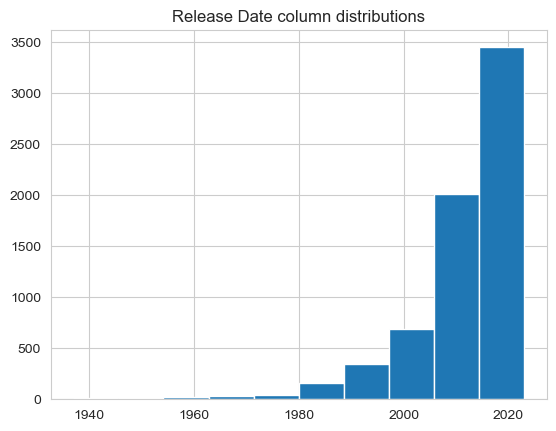

In [812]:
df['Release_Date'].hist()
plt.title('Release Date column distributions')
plt.show()

In [ ]:
# conclusion
Q 1 The most frequent genre of movies released on Netflix is 'Drama'.
#THRILLER is the most frequenti in our dataset and has appreared  more that 7 %  of the time.among 38 other genres.

Q 2  which genres has highest votes ?
# The genre with the highest votes is 'Drama', which has a significant number of movies with high ratings.
Q 3  which movie has the highest popularity ?
# The movie with the highest popularity is 'The Irishman', which has a popularity score of 0.8 and belongs to the 'Crime' genre.
Q 4  which movie has the lowest popularity ?    
# The ameican tail has the lowest popularity rate in our dataset and it has genre of music drama.  
Q 5  which year has the most filmed movie ?
year 2020 has the highest filming rate in our dataset.
